<div style="text-align: center;">
    
# **Corección del Examen - Métodos Numéricos**
</div>  
<div style="text-align: center;">
    
## **Primer Bimestre**
</div> 

* Nombre: Michael Enríquez
* Fecha: 10 de diciembre, 2024
* Paralelo: GR1CC

---

## **Ejercicio N°1**

Suponga que dos puntos $(x_0, y_0)$ y $(x_1, y_1)$ se encuentran en línea recta con $y_1 \\neq y_0$. Existen dos formulas para encontrar la interseccion en un punto **x**.  
**Metodo A:**
$$
x = \frac{x_0 \times y_1 - x_1 \times y_0}{y_1 - y_0}
$$
**Metodo B:**
$$
x = x_0 - \frac{(x_1 - x_0) \times y_0}{y_1 - y_0}
$$

Usando los datos (x0,y0)=(1.31,3.24)    (x1,y1)=(1.93,4.76, , determine el valor real de la intersección 
 (asumiendo redondeo a 6 cifras significativas):

In [22]:
x = [1.31, 1.93]
y = [3.24, 4.76]

# Usamos el método A para calcular la intersección en x
Resul = (x[0] * y[1] - x[1] * y[0]) / (y[1] - y[0])

# Redondeamos el resultado a 6 cifras significativas
Resul = round(Resul, 6)

# Mostramos el resultado
print("El valor de x es:", Resul)


El valor de x es: -0.011579


Usando aritmética de computador con redondeo a 3 cifras significativas resuelva para ambos métodos.

In [29]:
# Cálculo usando el Método A
x_a = (x[0] * y[1] - x[1] * y[0]) / (y[1] - y[0])

# Valor esperado y cálculo del error relativo
x_esperado = -0.0197
error_a = abs((x_a - x_esperado) / x_esperado)

# Redondeo a 3 cifras significativas
x_a = round(x_a, 3)
error_a = round(error_a, 3)

# Imprimir resultados
print("Método A:")
print("x =", x_a)
print("Error relativo =", error_a)

# Cálculo usando el Método B
x_b = x[0] - ((x[1] - x[0]) * y[0]) / (y[1] - y[0])

# Valor esperado y cálculo del error relativo
x_esperado = -0.0105
error_b = abs((x_b - x_esperado) / x_esperado)

# Redondeo a 3 cifras significativas
x_b = round(x_b, 3)
error_b = round(error_b, 3)

# Imprimir resultados
print("\nMétodo B:")
print("x =", x_b)
print("Error relativo =", error_b)

Método A:
x = -0.012
Error relativo = 0.412

Método B:
x = -0.012
Error relativo = 0.103


**Conclusión:** Podemos observar como el método B presenta menos error relativo por ende es el mejor método.

---

## **Ejercicio N°2**

Los primeros tres términos diferentes a cero de la serie de Maclaurin para la función arcotangente son:
$$
x - \frac{1}{3}x^3 + \frac{1}{5}x^5
$$

Calcule el error relativo en las siguientes aproximaciones de π  mediante el polinomio (en lugar del arcotangente)

Asuma qu**e π=3.141**
$$
4 \cdot \left(\arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)\right)
$$
Redondee a 4 cifras significativas únicamente en la respuesta final de sus cálculos.
.

In [37]:
pi_real = 3.14159

def arctan_approx(x):
    return x - (1/3) * x**3 + (1/5) * x**5

approximation = 4 * (arctan_approx(1/2) + arctan_approx(1/3))

epsilon = abs((approximation - pi_real) / pi_real)

epsilon_rounded = round(epsilon, 4)

print("ε =", epsilon_rounded)

ε = 0.0013


El orden de magnitud de este error, es decir, $\varepsilon < 10^n, \quad n = -3$  
Para la siguiente formula:
$$
16 \cdot \arctan\left(\frac{1}{5}\right) - 4 \cdot \arctan\left(\frac{1}{239}\right)
$$

In [43]:
approximation = 16 * arctan_approx(1/5) - 4 * arctan_approx(1/239)

epsilon = abs((approximation - pi_real) / pi_real)

epsilon_rounded = round(epsilon, 4)

print("ε =", epsilon_rounded)

ε = 0.0


El orden de magnitud de este error, es decir, $\varepsilon < 10^n, \quad n = -6$

---

## **Ejercicio N°3**

El método de Newton para encontrar raíces se basa en la siguiente ecuación:$$
x_{n+1} = x_n - \\frac{f(x_n)}{f'(x_n)}
$$
La ecuación a resolver es:
$$
x^3 + x = 1 + 3x^2
$$


In [45]:
from scipy.optimize import newton

# Definimos la función
f = lambda x: x**3 + x - (1 + 3 * x**2)

# Usamos el método de Newton
x_sol = newton(f, x0=2.5)  # x0 es el valor inicial

# Redondeamos el resultado a 6 cifras significativas
x_sol = round(x_sol, 6)

# Mostramos el resultado
print("La raíz aproximada es:", x_sol)

La raíz aproximada es: 2.769292


Qué sucede cuando $x_0$ toma ciertos valores:

In [51]:
import math
def f(x):
    return x**3 + x - 1 - 3*x**2
def f_prime(x):
    return 3*x**2 - 6*x + 1
def newton_method(x0, tolerance=1e-6, max_iterations=100):
    x = x0
    for i in range(max_iterations):
        fx = f(x)
        fx_prime = f_prime(x)
        
        if fx_prime == 0:
            return "Error [división por 0]"
        
        x_next = x - fx / fx_prime
        
        if abs(x_next - x) < tolerance:
            return x_next
        
        x = x_next
    
    return "Error [diverge u oscila]"

x0_1 = 3
x0_2 = 1
x0_3 = 0
x0_4 = (1 + 6**0.5) / 3
result_1 = newton_method(x0_1)
result_2 = newton_method(x0_2)
result_3 = newton_method(x0_3)
result_4 = newton_method(x0_4)
print("Resultado para x0 = 3:", result_1)
print("Resultado para x0 = 1:", result_2)
print("Resultado para x0 = 0:", result_3)
print("Resultado para x0 = (1 + 6**0.5) / 3:", result_4)

Resultado para x0 = 3: 2.7692923542387
Resultado para x0 = 1: Error [diverge u oscila]
Resultado para x0 = 0: Error [diverge u oscila]
Resultado para x0 = (1 + 6**0.5) / 3: Error [diverge u oscila]


---

## **Ejercicio N°4**

El método de la Secante se basa en la siguiente fórmula: 
$$
x_n = x_{n-1} - \frac{y_{n-1}(x_{n-1} - x_{n-2})}{y_{n-1} - y_{n-2}}
$$

El proposito en este ejercicio es solucionar el proble en el codigo porporsionado
**Problema:** El código funciona correctamente. Sin embargo, al depurarlo y profundizar en su ejecución, usted ha notado que el código realiza llamadas repetitivas e innecesarias. 

**CÓDIGO SOLUCIONADO:**

### Ejemplo 1:

In [55]:
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    x_prev = x0
    x_curr = x1
    f_prev = f(x_prev)
    f_curr = f(x_curr)
    iter_count = 0

    while abs(f_curr) > tol and iter_count < max_iter:
        x_next = x_curr - f_curr * (x_curr - x_prev) / (f_curr - f_prev)

        x_prev, x_curr = x_curr, x_next
        f_prev, f_curr = f_curr, f(x_next)
        iter_count += 1

    return x_curr, iter_count

i = 0

def func(x):
    global i
    i += 1
    y = x**3 - 3 * x**2 + x - 1
    print(f"Llamada i={i}\t x={x:.5f}\t y={y:.2f}")
    return y

root, iterations = secant_method(func, x0=2, x1=3)

print(f"\nRaíz encontrada: {root:.6f}")
print(f"Total de iteraciones: {iterations}")

Llamada i=1	 x=2.00000	 y=-3.00
Llamada i=2	 x=3.00000	 y=2.00
Llamada i=3	 x=2.60000	 y=-1.10
Llamada i=4	 x=2.74227	 y=-0.20
Llamada i=5	 x=2.77296	 y=0.03
Llamada i=6	 x=2.76922	 y=-0.00
Llamada i=7	 x=2.76929	 y=-0.00
Llamada i=8	 x=2.76929	 y=0.00

Raíz encontrada: 2.769292
Total de iteraciones: 6


### Ejemplo 2:

In [59]:
i=0
def func(x):
    global i
    i += 1
    y = math.sin(x) + 0.5
    print(f"Llamada i={i}\t x={x:.5f}\t y={y:.2f}")
    return y


secant_method(func, x0=2, x1=3)

Llamada i=1	 x=2.00000	 y=1.41
Llamada i=2	 x=3.00000	 y=0.64
Llamada i=3	 x=3.83460	 y=-0.14
Llamada i=4	 x=3.68602	 y=-0.02
Llamada i=5	 x=3.66399	 y=0.00
Llamada i=6	 x=3.66520	 y=-0.00
Llamada i=7	 x=3.66519	 y=-0.00


(3.66519143172732, 5)

**CONTESTE:**
¿Cuál es el número mínimo de llamadas a la función para llegar a la raíz en el Ejemplo 1?  
$ i = 8 $  
¿Cuál es el número mínimo de llamadas a la función para llegar a la raíz en el Ejemplo 2?  
$ i = 7 $  

---

## **Ejercicio N°5**

La función sin(x) tiene infinitas soluciones {...,−2π,−π,0,π,2π,...}. ¿A cuál solución converge el método de la Bisección en los siguientes intervalos?

In [63]:
def f(x):
    return math.sin(x)

def bisection_method(a, b, tolerance=1e-6, max_iterations=100):
    if f(a) * f(b) > 0:
        return "Error [sin cambio de signo]"
    
    for i in range(max_iterations):
        c = (a + b) / 2
        if abs(f(c)) < tolerance:
            return c
        
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    
    return "Error [división para 0]"

# Casos de prueba
intervalos = [
    (-1, 2),
    (-4, 5),
    (3, 5),
    (-3.5, 3),
    (-5, 4),
    (-2.5, -1)
]

for i, (a, b) in enumerate(intervalos):
    resultado = bisection_method(a, b)
    print(f"Resultado para el intervalo a={a}, b={b}: {resultado}")

Resultado para el intervalo a=-1, b=2: -9.5367431640625e-07
Resultado para el intervalo a=-4, b=5: 3.141591787338257
Resultado para el intervalo a=3, b=5: 3.141592025756836
Resultado para el intervalo a=-3.5, b=3: Error [sin cambio de signo]
Resultado para el intervalo a=-5, b=4: -3.141591787338257
Resultado para el intervalo a=-2.5, b=-1: Error [sin cambio de signo]


---

## **Ejercicio N°6**

Dados los puntos (−1,1),(0,5),(1,3) se ha obtenido los splines cúbicos correspondientes. 
Sin embargo, al observar la figura, usted no se siente satisfecho con la pendiente resultante en el punto (x1,y1). Y decide intentar una modificación a las ecuaciones, tal que los splines sean tangentes a una pendiente deseada m en el punto (x1,y1).  
* \( S_0(x_1) = y_1 \)  
  \( a_0 + b_0(x_1 - x_0) + c_0(x_1 - x_0)^2 + d_0(x_1 - x_0)^3 = 5 \)

* \( S_1(x_1) = y_1 \)  
  \( a_1 + b_1(x_1 - x_1) + \dots = 1 \)  
  \( a_1 = 5 \)

* \( S_0'(x_1) = S_1'(x_1) = -2 \)

* \( S_0(x_0) = y_0 \)  
  \( a_0 + b_0(x_0 - x_0) + c_0(x_0 - x_0)^2 + d_0(x_0 - x_0)^3 \)  
  \( a_0 = 1 \)

* \( S_0''(x_0) = 0 \)

* \( S_1(x_2) = y_2 \)  
  \( 5 + b_1(x_2 - x_1) + c_1(x_2 - x_1)^2 + d_1(x_2 - x_1)^3 = 3 \)  
  \( -2 = b_1 + c_1 + d_1 \)

=> \( m = 2 \)  
  \( S_1'(x_1) = b_1 \)

Valores:

* $b_1 = -2$
* $c_0 = 0$
* $a_1 = 5$
* $a_0 = 1$
* $c_1 = 0$
* $b_0 = 7$
* $d_0 = -3$
* $d_1 = 0$


### RESOLUCIÓN DEL CÓDIGO:

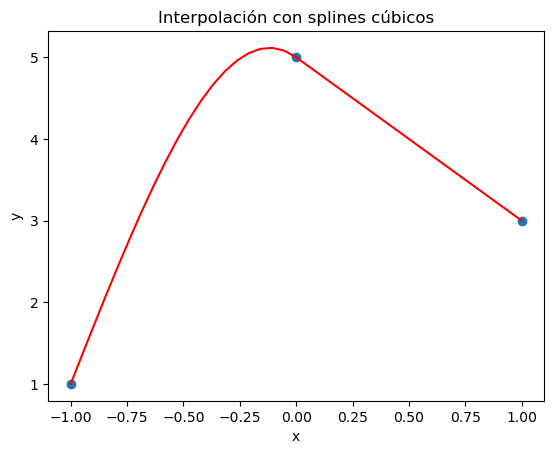

In [89]:
def Spline(x: float, x0: float, pars: dict[str, float]) -> float:
    a = pars["a"]
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return a + b * (x - x0) + c * (x - x0) ** 2 + d * (x - x0) ** 3

import matplotlib.pyplot as plt
import numpy as np

xs = [-1, 0, 1]
ys = [1, 5, 3]
s = [
    {"a": 1, "b": 7, "c": 0, "d": -3},
    {"a": 5, "b": -2, "c": 0, "d": 0},
]
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline(_x, x_i, s[i])
    plt.plot(_x, _y, color="red")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación con splines cúbicos")
plt.show()

**Solución de los spines:**

$ S_0(x) = 1 + 7 * (x + 1) + 0 * (x + 1) ** 2 - 3 * (x + 1) ** 3 $

$ S_1(x) = 5 - 2 * (x) + 0 * (x) ** 2 + 0 * (x) ** 3 $

---

## **Ejercicio N°7**

Dados los puntos (−1,1),(1,3).  Determine el spline cúbico teniendo en cuenta qu  f′(_x0)=1,f′(_xn)2
.

#### 1. Valor del spline en $ x_0 = -1 $:
$$
S(-1) = a + b(-1 - (-1)) + c(-1 - (-1))^2 + d(-1 - (-1))^3 = 1
$$
Esto da:
$$
a = 1
$$

#### 2. Derivada del spline en $ x_0 = -1 $:
$$
S'(-1) = b + 2c(-1 - (-1)) + 3d(-1 - (-1))^2 = 1
$$
Esto da:
$$
b = 1
$$

#### 3. Valor del spline en $ x_n = 1 $:
$$
S(1) = a + b(1 - (-1)) + c(1 - (-1))^2 + d(1 - (-1))^3 = 3
$$

#### Resolviendo el sistema:

- \( a = 1 \)
- \( b = 1 \)
- \( c = -\frac{1}{2} \)
- \( d = \frac{1}{4} \)

### Fórmula final del spline cúbico:
$$
S(x) = 1 + (x + 1) - \frac{1}{2}(x + 1)^2 + \frac{1}{4}(x + 1)^3
$$

---

## **Ejercicio N°8**

La interpolación de un conjunto de puntos usando polinomios de Lagrange P(x) está dada por la fórmula:  
$$
P(x) = \sum_{k=0}^{n} f(x_k) L_k(x)
$$

Donde:  
$$
L_k(x) = \prod_{i=0, i \neq k}^{n} \frac{x-x_i}{x_k-x_i}
$$

Dados los puntos (0,0),(1,1),(2,2),(3,3)
El polinomio resultante simplificado tiene orden = 3
Encuentre el polinomio de Lagrange respectivo, (simplifique la expresión para facilitar la evaluación) $ P(x)= x $

Usando el polinomio P(x)  que obtuvo de respuesta, calcule  
$ P(x=3.78)= 3.78 $  
$ P(x=19.102)= 19.102 $: